In [42]:
# Import semua library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# Set style untuk plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [43]:
print("SOAL 1: AUTOKORELASI (DURBIN-WATSON TEST)")
print("=" * 50)

# Parameter simulasi
np.random.seed(123)
n = 200      # Jumlah observasi
beta0 = 1.0  # Intercept
beta1 = 2.5  # Koefisien slope
sigma = 1.0  # Standar deviasi
rho = 0.7    # Koefisien autokorelasi

# Variabel independen
x = np.random.normal(0, 1, n)

# Bangkitkan error AR(1)
u = np.random.normal(0, sigma, n)
eps = np.zeros(n)
eps[0] = u[0]
for t in range(1, n):
    eps[t] = rho * eps[t-1] + u[t]

# Variabel dependen
y = beta0 + beta1 * x + eps

print("Data berhasil dibuat!")
print(f"Panjang data: {len(y)} observasi")

SOAL 1: AUTOKORELASI (DURBIN-WATSON TEST)
Data berhasil dibuat!
Panjang data: 200 observasi


In [44]:
# Model regresi
X_sm = sm.add_constant(x)  # Menambahkan intercept
model1 = sm.OLS(y, X_sm).fit()

print("Ringkasan Model Regresi:")
print(model1.summary())

Ringkasan Model Regresi:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     868.6
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           2.49e-74
Time:                        19:14:48   Log-Likelihood:                -333.61
No. Observations:                 200   AIC:                             671.2
Df Residuals:                     198   BIC:                             677.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6209      

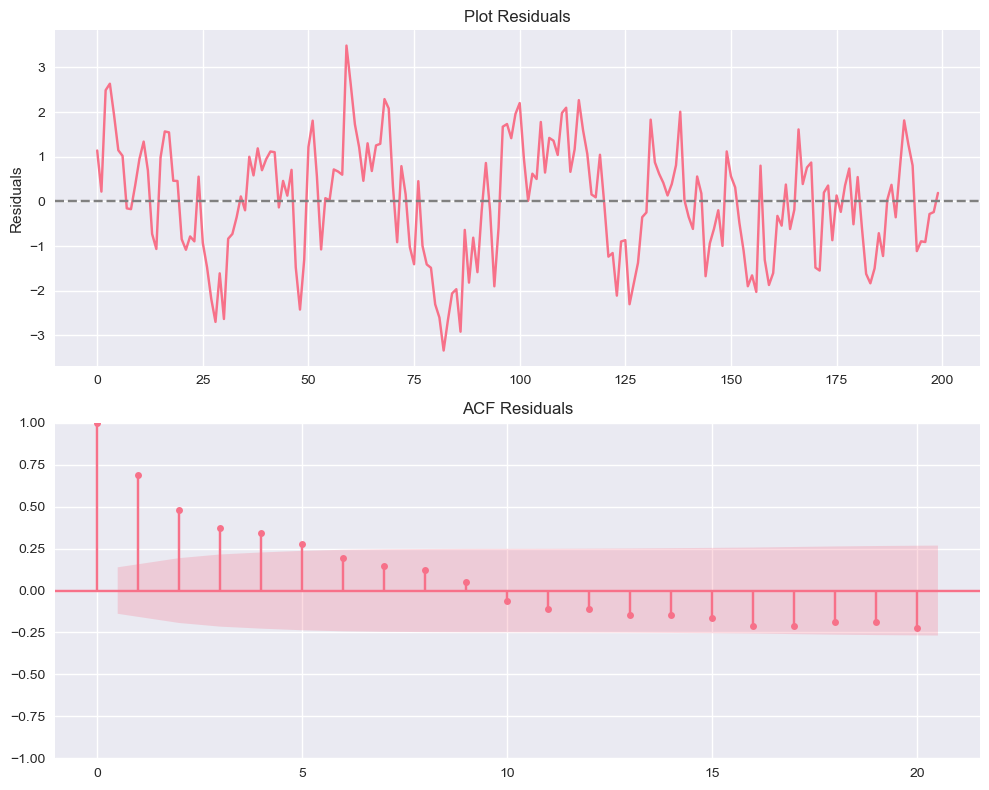

In [45]:
# Visualisasi dan pemeriksaan sisaan
residuals1 = model1.resid

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot residuals
ax1.plot(residuals1)
ax1.axhline(y=0, color='gray', linestyle='--')
ax1.set_title('Plot Residuals')
ax1.set_ylabel('Residuals')

# ACF residuals
sm.graphics.tsa.plot_acf(residuals1, ax=ax2, lags=20)
ax2.set_title('ACF Residuals')

plt.tight_layout()
plt.show()

In [46]:
# Uji Durbin-Watson
dw_stat = durbin_watson(residuals1)
print(f"\nStatistik Durbin-Watson: {dw_stat:.4f}")

# Interpretasi Durbin-Watson
if dw_stat < 1.5:
    print("Ada autokorelasi positif yang kuat")
elif dw_stat > 2.5:
    print("Ada autokorelasi negatif yang kuat")
else:
    print("Tidak ada autokorelasi yang signifikan")


Statistik Durbin-Watson: 0.6192
Ada autokorelasi positif yang kuat


In [47]:
print("SOAL 2: MULTIKOLINEARITAS (VIF TEST)")
print("=" * 50)

np.random.seed(123)
n = 100

# Variabel independen dengan multikolinearitas
X1 = np.random.normal(50, 10, n)
X2 = 0.8 * X1 + np.random.normal(0, 2, n)      # Sangat berkorelasi dengan X1
X3 = 0.5 * X1 + 0.3 * X2 + np.random.normal(0, 5, n)  # Kombinasi X1 & X2
X4 = np.random.normal(100, 20, n)              # Tidak berkorelasi dengan X1-X3

# Variabel dependen
Y = 5 + 0.6 * X1 + 0.4 * X2 + 0.2 * X3 + np.random.normal(0, 5, n)

# Data frame
data_ml = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})
print("Data Sample:")
print(data_ml.head())

SOAL 2: MULTIKOLINEARITAS (VIF TEST)
Data Sample:
           Y         X1         X2         X3          X4
0  55.769917  39.143694  32.599065  32.868117  115.301097
1  63.984317  59.973454  44.022988  40.203097   83.420223
2  61.823335  52.829785  43.688357  50.524910   86.816974
3  38.845682  34.937053  33.146250  30.853886  112.222471
4  52.148284  44.213997  35.321946  32.672046   97.119733


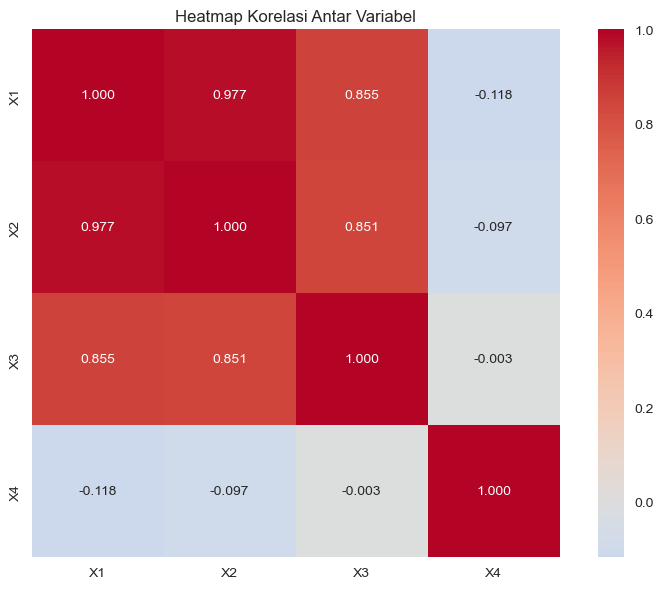

In [48]:
# Visualisasi korelasi antar variabel
corr_matrix = data_ml[['X1', 'X2', 'X3', 'X4']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.tight_layout()
plt.show()

In [49]:
# Analisis regresi linear
X_ml = sm.add_constant(data_ml[['X1', 'X2', 'X3', 'X4']])
model2 = sm.OLS(data_ml['Y'], X_ml).fit()

print("\nRingkasan Hasil Regresi:")
print(model2.summary())


Ringkasan Hasil Regresi:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           2.03e-38
Time:                        19:14:49   Log-Likelihood:                -304.09
No. Observations:                 100   AIC:                             618.2
Df Residuals:                      95   BIC:                             631.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6802     

In [50]:
# Fungsi untuk menghitung VIF
def calculate_vif(X):
    """Menghitung VIF untuk setiap variabel"""
    vif_data = pd.DataFrame()
    vif_data["Variabel"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]
    return vif_data

# Uji VIF
vif_results = calculate_vif(X_ml)
print("\nHasil Uji VIF:")
print(vif_results)

# Interpretasi VIF
if any(vif_results['VIF'] > 10):
    print("\nTerdapat multikolinearitas tinggi (VIF > 10)")
elif any(vif_results['VIF'] > 5):
    print("\nAda indikasi multikolinearitas sedang (VIF > 5)")
else:
    print("\nTidak ada masalah multikolinearitas")


Hasil Uji VIF:
  Variabel        VIF
0    const  59.206390
1       X1  24.002436
2       X2  23.027448
3       X3   3.914263
4       X4   1.056682

Terdapat multikolinearitas tinggi (VIF > 10)


In [51]:
print("SOAL 3: KENORMALAN SISAAN (SHAPIRO-WILK TEST)")
print("=" * 50)

# Parameter dan jumlah sampel
np.random.seed(123)
n = 200
beta0 = 1.5
beta1 = 2.0

# Variabel prediktor (X)
x = np.random.uniform(-3, 3, n)

# Error (sisaan sesungguhnya) ~ Normal(0,1)
eps = np.random.normal(0, 1, n)

# Variabel respon (Y)
y = beta0 + beta1 * x + eps

# Data frame
df = pd.DataFrame({'x': x, 'y': y})
print("Data Sample:")
print(df.head())

SOAL 3: KENORMALAN SISAAN (SHAPIRO-WILK TEST)
Data Sample:
          x         y
0  1.178815  3.116816
1 -1.283164 -0.993421
2 -1.638891 -1.374697
3  0.307889  3.587707
4  1.316814  4.441012


In [52]:
# Model regresi
X_norm = sm.add_constant(df['x'])
model3 = sm.OLS(df['y'], X_norm).fit()

print("\nRingkasan Model Regresi:")
print(model3.summary())

# Mengambil residu
residuals3 = model3.resid


Ringkasan Model Regresi:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     2211.
Date:                Mon, 06 Oct 2025   Prob (F-statistic):          2.17e-109
Time:                        19:14:49   Log-Likelihood:                -273.99
No. Observations:                 200   AIC:                             552.0
Df Residuals:                     198   BIC:                             558.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3784     

In [53]:
# Uji Kenormalan Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(residuals3)
print(f"Uji Shapiro-Wilk:")
print(f"Statistik = {shapiro_stat:.4f}")
print(f"p-value = {shapiro_p:.4f}")

# Interpretasi Shapiro-Wilk
if shapiro_p > 0.05:
    print("Kesimpulan: Sisaan berdistribusi normal (p-value > 0.05)")
else:
    print("Kesimpulan: Sisaan TIDAK berdistribusi normal (p-value ≤ 0.05)")

Uji Shapiro-Wilk:
Statistik = 0.9961
p-value = 0.8973
Kesimpulan: Sisaan berdistribusi normal (p-value > 0.05)


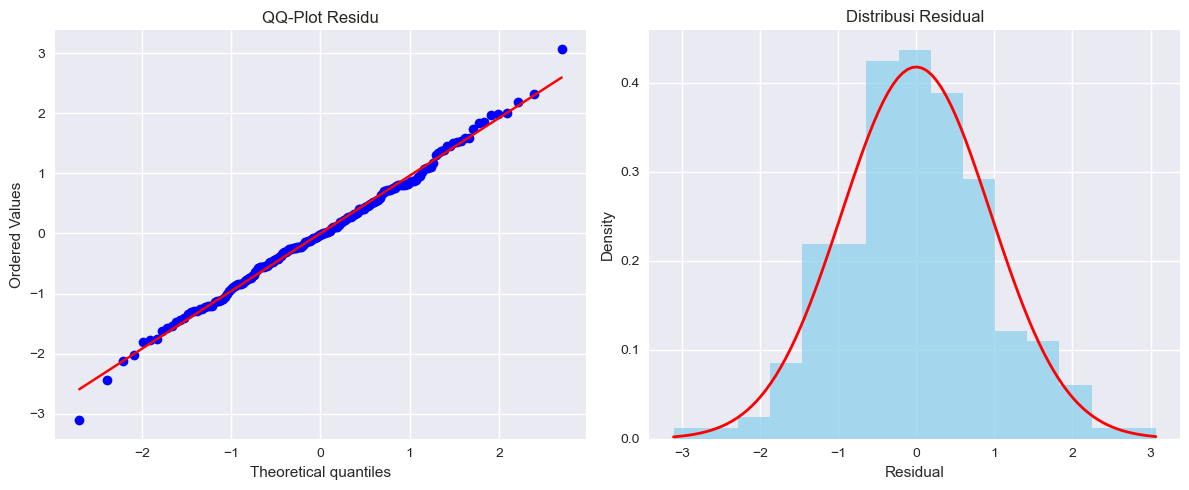


Statistik Deskriptif Residual:
• Mean = -0.0000
• Standar Deviasi = 0.9546
• Distribusi: N(-0.00, 0.95²)


In [54]:
# Visualisasi distribusi sisaan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# QQ-Plot
stats.probplot(residuals3, dist="norm", plot=ax1)
ax1.set_title('QQ-Plot Residu')

# Histogram dengan kurva normal
ax2.hist(residuals3, bins=15, density=True, alpha=0.7, color='skyblue')
x_norm = np.linspace(residuals3.min(), residuals3.max(), 100)
y_norm = stats.norm.pdf(x_norm, residuals3.mean(), residuals3.std())
ax2.plot(x_norm, y_norm, 'r-', linewidth=2)
ax2.set_title('Distribusi Residual')
ax2.set_xlabel('Residual')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

# Statistik deskriptif
print(f"\nStatistik Deskriptif Residual:")
print(f"• Mean = {residuals3.mean():.4f}")
print(f"• Standar Deviasi = {residuals3.std():.4f}")
print(f"• Distribusi: N({residuals3.mean():.2f}, {residuals3.std():.2f}²)")

In [55]:
print("SOAL 4: HETEROSKEDASTISITAS (BREUSCH-PAGAN TEST)")
print("=" * 50)

np.random.seed(123)
n = 100

# Variabel independen
x = np.random.uniform(1, 10, n)

# Sisaan tidak homogen: varians tergantung pada X
error = np.random.normal(0, x * 0.5, n)

# Variabel dependen (model linier)
y = 5 + 2 * x + error

# Data frame
data_hetero = pd.DataFrame({'x': x, 'y': y})
print("Data Sample:")
print(data_hetero.head())

SOAL 4: HETEROSKEDASTISITAS (BREUSCH-PAGAN TEST)
Data Sample:
          x          y
0  7.268223  27.121248
1  3.575254  12.444468
2  3.041663  12.832595
3  5.961833  13.145795
4  7.475221  20.627080


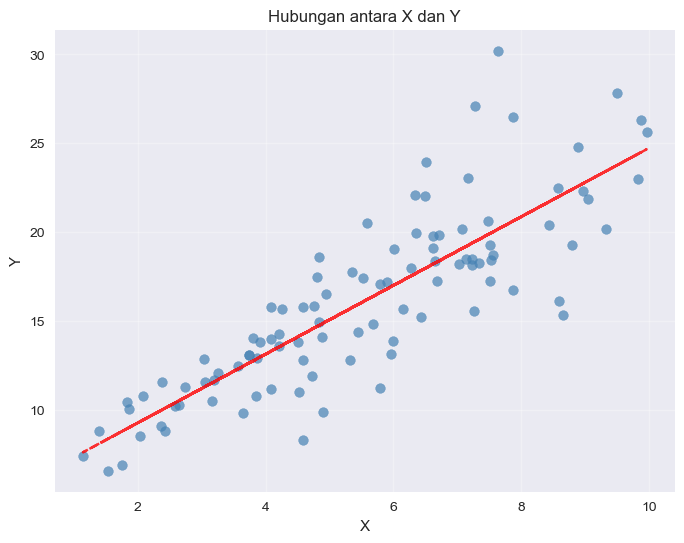

In [56]:
# Visualisasi data
plt.figure(figsize=(8, 6))
plt.scatter(data_hetero['x'], data_hetero['y'], alpha=0.7, color='steelblue')

# Garis regresi
z = np.polyfit(data_hetero['x'], data_hetero['y'], 1)
p = np.poly1d(z)
plt.plot(data_hetero['x'], p(data_hetero['x']), "r--", alpha=0.8)

plt.title('Hubungan antara X dan Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()

In [57]:
# Model regresi
X_hetero = sm.add_constant(data_hetero['x'])
model4 = sm.OLS(data_hetero['y'], X_hetero).fit()

print("\nRingkasan Model Regresi:")
print(model4.summary())


Ringkasan Model Regresi:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           2.92e-28
Time:                        19:14:50   Log-Likelihood:                -241.89
No. Observations:                 100   AIC:                             487.8
Df Residuals:                      98   BIC:                             493.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3734     

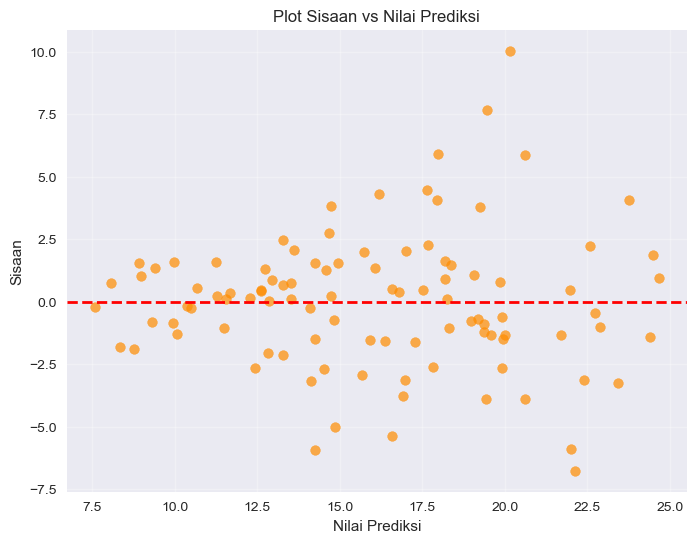

In [58]:
# Plot sisaan vs nilai prediksi
residuals4 = model4.resid
fitted_values = model4.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals4, alpha=0.7, color='darkorange')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Plot Sisaan vs Nilai Prediksi')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Sisaan')
plt.grid(True, alpha=0.3)
plt.show()

In [59]:
# Uji Breusch-Pagan
bp_lm, bp_lm_pvalue, bp_f, bp_f_pvalue = het_breuschpagan(residuals4, X_hetero)

print(f"\nUji Breusch-Pagan:")
print(f"LM Statistic = {bp_lm:.4f}")
print(f"LM p-value = {bp_lm_pvalue:.4f}")
print(f"F Statistic = {bp_f:.4f}")
print(f"F p-value = {bp_f_pvalue:.4f}")

# Interpretasi Breusch-Pagan
if bp_lm_pvalue < 0.05:
    print("Kesimpulan: Terdapat heteroskedastisitas (p-value < 0.05)")
else:
    print("Kesimpulan: Tidak terdapat heteroskedastisitas (p-value ≥ 0.05)")


Uji Breusch-Pagan:
LM Statistic = 7.6073
LM p-value = 0.0058
F Statistic = 8.0690
F p-value = 0.0055
Kesimpulan: Terdapat heteroskedastisitas (p-value < 0.05)


In [60]:
print("SEMUA ANALISIS TELAH SELESAI")
print("=" * 50)
print("\nRingkasan Hasil:")
print("1. Soal 1: Autokorelasi - Selesai dengan uji Durbin-Watson")
print("2. Soal 2: Multikolinearitas - Selesai dengan uji VIF")
print("3. Soal 3: Kenormalan - Selesai dengan uji Shapiro-Wilk")
print("4. Soal 4: Heteroskedastisitas - Selesai dengan uji Breusch-Pagan")

SEMUA ANALISIS TELAH SELESAI

Ringkasan Hasil:
1. Soal 1: Autokorelasi - Selesai dengan uji Durbin-Watson
2. Soal 2: Multikolinearitas - Selesai dengan uji VIF
3. Soal 3: Kenormalan - Selesai dengan uji Shapiro-Wilk
4. Soal 4: Heteroskedastisitas - Selesai dengan uji Breusch-Pagan
